In [43]:
import pysal
import geopandas

In [44]:
pysal.__version__

'1.14.4'

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt


In [46]:
pysal.examples.available()

['newHaven',
 'book',
 'londonhp',
 'nyc_bikes',
 'south',
 'Line',
 'tokyo',
 'clearwater',
 'sacramento2',
 'nat',
 'wmat',
 'mexico',
 'georgia',
 'burkitt',
 'juvenile',
 'street_net_pts',
 'geodanet',
 'desmith',
 'sids2',
 'snow_maps',
 'us_income',
 'Point',
 '10740',
 'virginia',
 'baltim',
 'calemp',
 'taz',
 'chicago',
 'stl',
 'arcgis',
 'columbus',
 'Polygon_Holes',
 'networks',
 'Polygon']

In [47]:
pysal.examples.explain('south')

{'name': 'south',
 'description': 'Homicides and selected socio-economic characteristics for Southern U.S. counties (subset of NCOVR national data set). Data for four decennial census years: 1960, 1970, 1980, 1990.',
 'explanation': ['* south.dbf: attribute data. (k=69)',
  '* south.shp: Polygon shapefile. (n=1412)',
  '* south.shx: spatial index.',
  '* south_q.gal: queen contiguity weights in GAL format.',
  '* south_queen.gal: queen contiguity weights in GAL format.']}

In [48]:
south_path = pysal.examples.get_path('south.shp')

In [49]:
df = geopandas.read_file(south_path)

In [50]:
df.head()

FIPSNO        NAME     STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  STFIPS  \
0   54029     Hancock  West Virginia         54       029  54029      54   
1   54009      Brooke  West Virginia         54       009  54009      54   
2   54069        Ohio  West Virginia         54       069  54069      54   
3   54051    Marshall  West Virginia         54       051  54051      54   
4   10003  New Castle       Delaware         10       003  10003      10   

   COFIPS  SOUTH      HR60  ...      BLK90      GI59      GI69      GI79  \
0      29      1  1.682864  ...   2.557262  0.223645  0.295377  0.332251   
1       9      1  4.607233  ...   0.748370  0.220407  0.318453  0.314165   
2      69      1  0.974132  ...   3.310334  0.272398  0.358454  0.376963   
3      51      1  0.876248  ...   0.546097  0.227647  0.319580  0.320953   
4       3      1  4.228385  ...  16.480294  0.256106  0.329678  0.365830   

       GI89       FH60  FH70       FH80       FH90  \
0  0.363934   9.981297   7.8   9.785797  12.604552   
1  0.350569  10.929337   8.0  10.214990  11.242293   
2  0.390534  15.621643  12.9  14.716681  17.574021   
3  0.377346  11.962834   8.8   8.803253  13.564159   
4  0.332703  12.035714  10.7  15.169480  16.380903   

                                            geometry  
0  POLYGON ((-80.6280517578125 40.39815902709961,...  
1  POLYGON ((-80.52625274658203 40.16244888305664...  
2  POLYGON ((-80.52516937255859 40.02275085449219...  
3  POLYGON ((-80.52446746826172 39.72112655639648...  
4  POLYGON ((-75.77269744873047 39.38300704956055...  

[5 rows x 70 columns]

In [51]:
df.shape

(1412, 70)

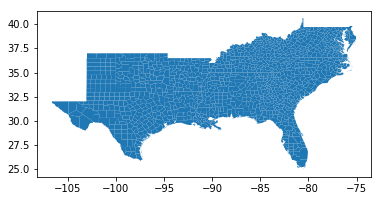

In [52]:
df.plot()

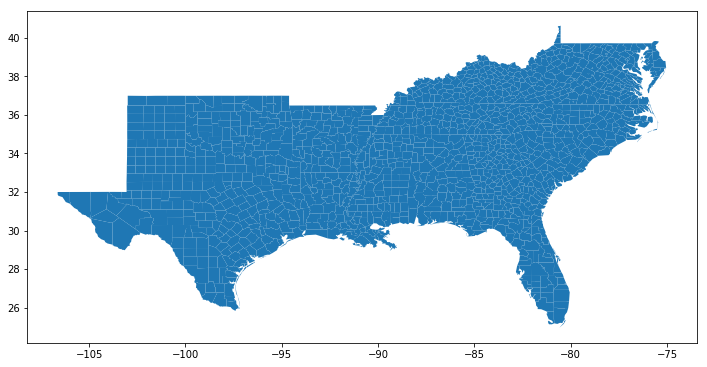

In [53]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(axes=ax)
plt.show()

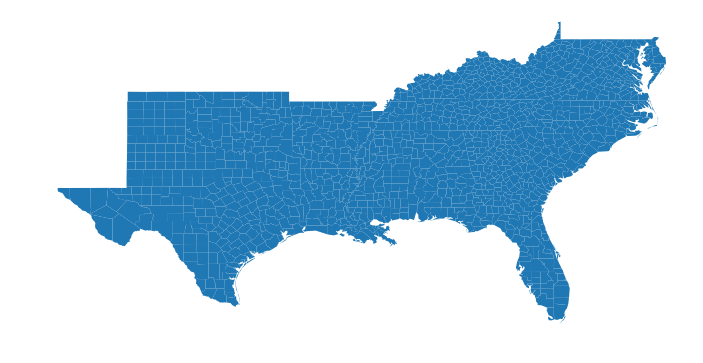

In [54]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(axes=ax)
ax.set_axis_off()
plt.show()

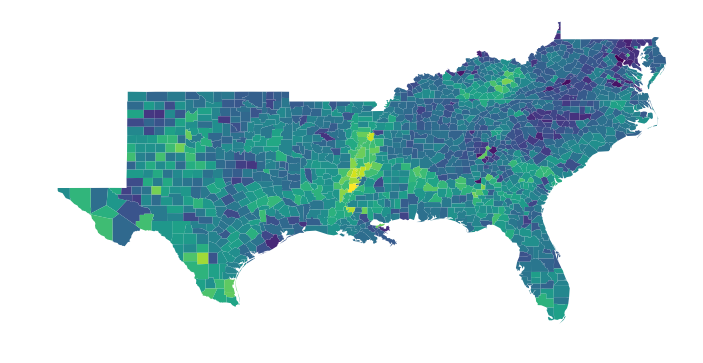

In [55]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='GI79',axes=ax)
ax.set_axis_off()
plt.show()

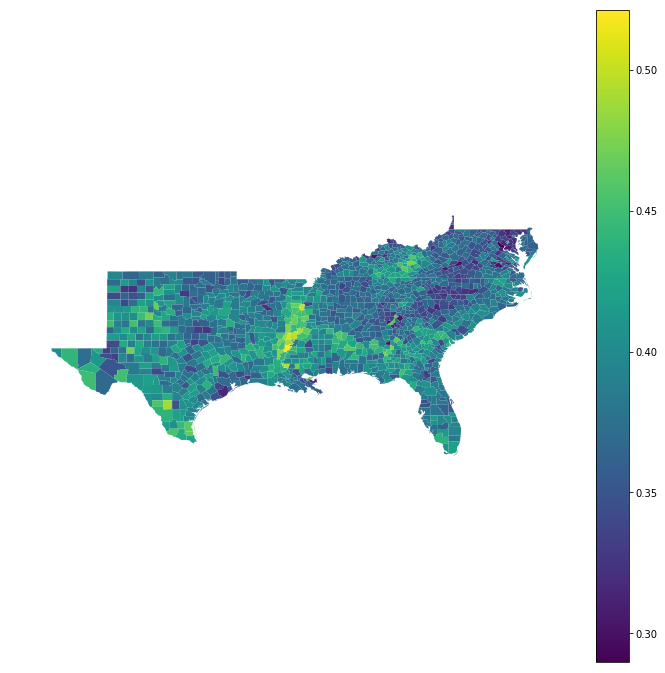

In [56]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='GI79',axes=ax, legend=True)
ax.set_axis_off()
plt.show()

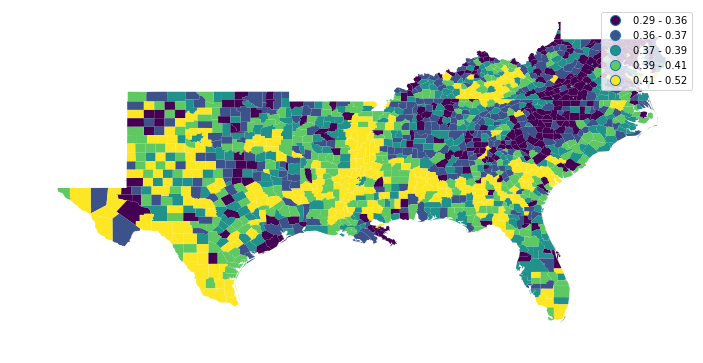

In [57]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='GI79',scheme='Quantiles', k= 5, axes=ax, legend=True)
ax.set_axis_off()
plt.show()

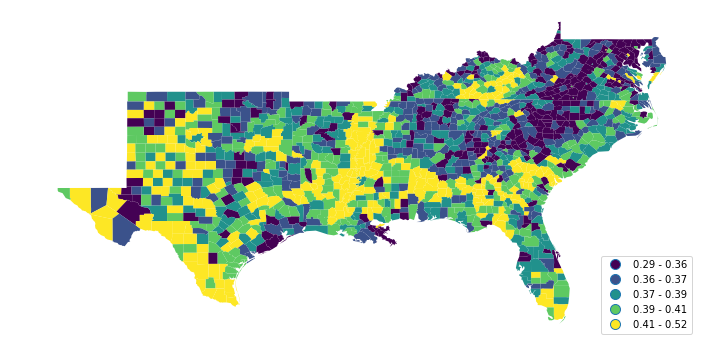

In [58]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='GI79',scheme='Quantiles', k= 5, axes=ax, legend=True,
            legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
plt.show()

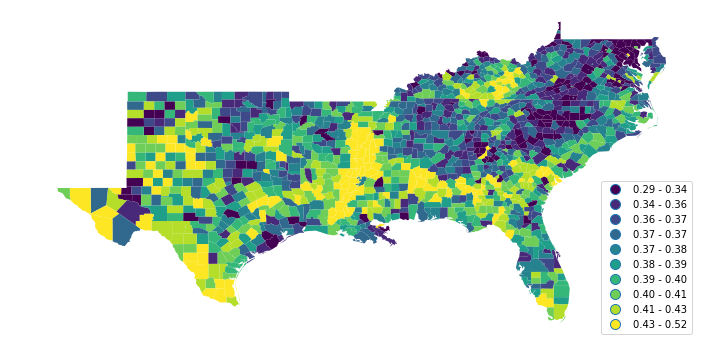

In [59]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='GI79',scheme='Quantiles', k= 10, axes=ax, legend=True,
            legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
plt.show()

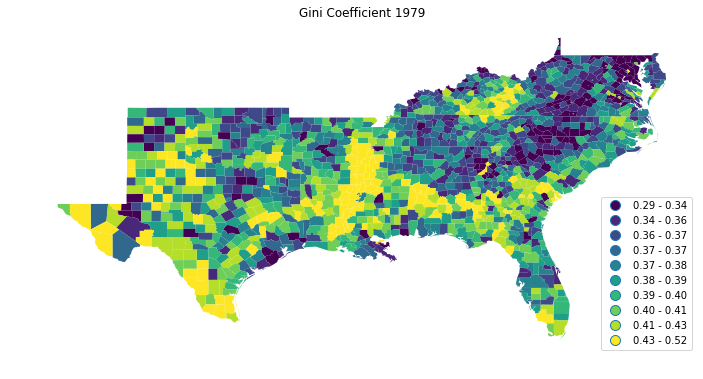

In [60]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='GI79',scheme='Quantiles', k= 10, axes=ax, legend=True,
            legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
plt.title('Gini Coefficient 1979')
plt.show()

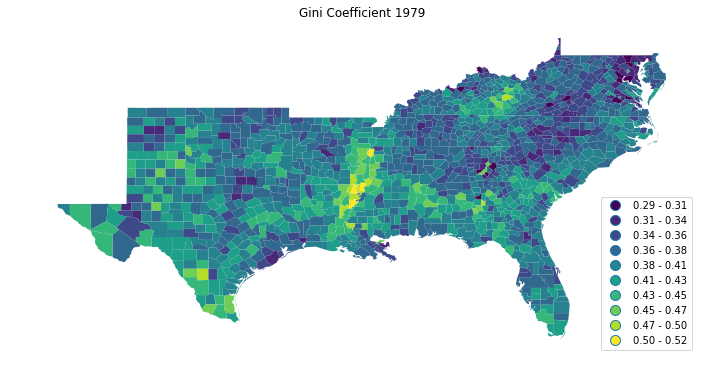

In [61]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='GI79',scheme='equal_interval', k= 10, axes=ax, legend=True,
            legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
plt.title('Gini Coefficient 1979')
plt.show()

In [62]:
y = df.GI79


In [63]:
from pysal.esda import mapclassify

In [64]:
eq10 = mapclassify.Equal_Interval(y, k=10)

In [65]:
eq10

             Equal Interval            
 
Lower          Upper              Count
        x[i] <= 0.313                18
0.313 < x[i] <= 0.336                65
0.336 < x[i] <= 0.359               216
0.359 < x[i] <= 0.382               420
0.382 < x[i] <= 0.405               352
0.405 < x[i] <= 0.429               204
0.429 < x[i] <= 0.452                94
0.452 < x[i] <= 0.475                29
0.475 < x[i] <= 0.498                10
0.498 < x[i] <= 0.521                 4

In [66]:
q10 = mapclassify.Quantiles(y, k=10)
q10

               Quantiles               
 
Lower          Upper              Count
        x[i] <= 0.345               142
0.345 < x[i] <= 0.357               141
0.357 < x[i] <= 0.367               141
0.367 < x[i] <= 0.375               141
0.375 < x[i] <= 0.382               141
0.382 < x[i] <= 0.390               141
0.390 < x[i] <= 0.399               141
0.399 < x[i] <= 0.411               141
0.411 < x[i] <= 0.428               141
0.428 < x[i] <= 0.521               142

In [67]:
htb = mapclassify.HeadTail_Breaks(y)
htb

            HeadTail_Breaks            
 
Lower          Upper              Count
        x[i] <= 0.384               754
0.384 < x[i] <= 0.412               388
0.412 < x[i] <= 0.435               157
0.435 < x[i] <= 0.454                74
0.454 < x[i] <= 0.474                25
0.474 < x[i] <= 0.492                 8
0.492 < x[i] <= 0.503                 4
0.503 < x[i] <= 0.514                 1
0.514 < x[i] <= 0.521                 1

## Bivariate Mapping

In [68]:
hr80 = df.HR80

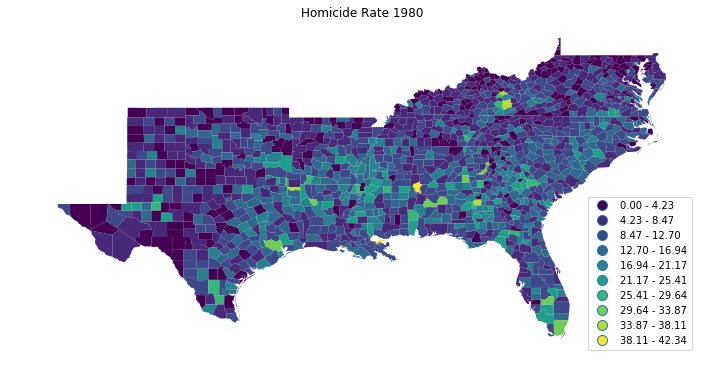

In [76]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='HR80',scheme='equal_interval', k= 10, axes=ax, legend=True,
            legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
plt.title('Homicide Rate 1980')
plt.show()

In [78]:
import seaborn as sns

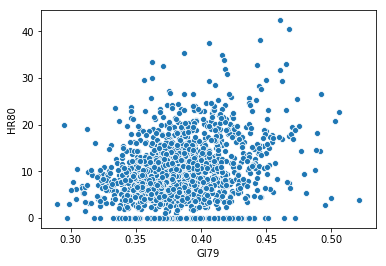

In [79]:
sns.scatterplot('GI79', 'HR80', data=df)

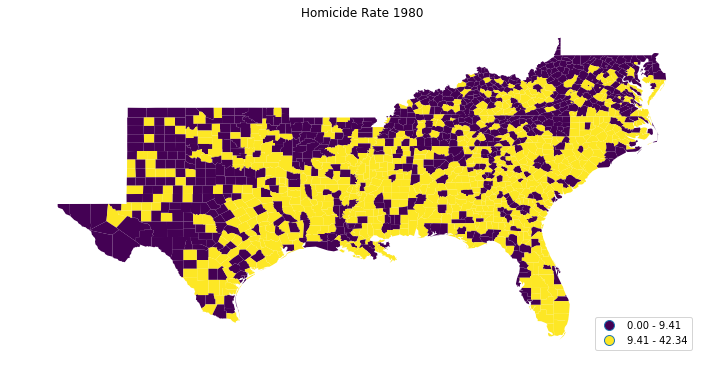

In [70]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='HR80',scheme='Quantiles', k= 2, axes=ax, legend=True,
            legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
plt.title('Homicide Rate 1980')
plt.show()

In [71]:
hr80.median()

9.41102095315

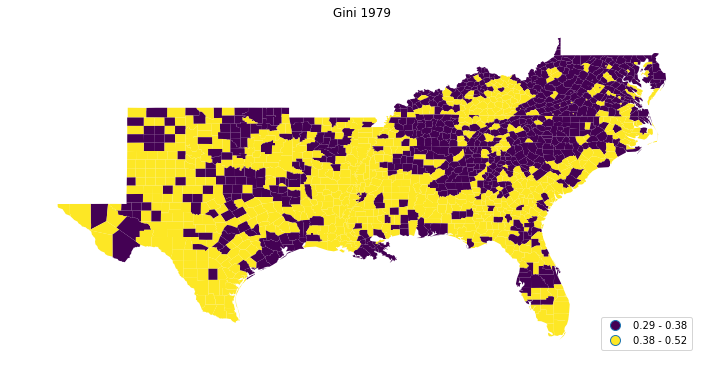

In [31]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='GI79',scheme='Quantiles', k=2, axes=ax, legend=True,
            legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
plt.title('Gini 1979')
plt.show()

In [32]:
df.GI79.median()

0.38169551785

In [33]:
HHR = hr80 > hr80.median()

In [34]:
HHR

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1382    False
1383    False
1384     True
1385    False
1386     True
1387    False
1388     True
1389    False
1390    False
1391     True
1392     True
1393     True
1394    False
1395     True
1396    False
1397     True
1398     True
1399     True
1400     True
1401     True
1402     True
1403     True
1404     True
1405    False
1406    False
1407     True
1408    False
1409    False
1410    False
1411    False
Name: HR80, Length: 1412, dtype: bool

In [35]:
HGI = df.GI79 > df.GI79.median()

In [36]:
Q = HGI*HHR + 2 * (1-HGI)* HHR + 3 * (1-HGI) * (1-HHR) + 4 * HGI * (1-HHR)
# 1: High Gini, High Homicide Rate
# 2: Low Gini,  High Homicide Rate 
# 3: Low Gini,  Low Homicide Rate
# 4: High Gini, Low Homicide Rate

/home/serge/anaconda3/envs/pbpl204s19/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [37]:
Q

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
       ..
1382    4
1383    4
1384    1
1385    4
1386    1
1387    4
1388    2
1389    4
1390    3
1391    1
1392    1
1393    1
1394    4
1395    1
1396    4
1397    1
1398    1
1399    1
1400    1
1401    1
1402    2
1403    2
1404    2
1405    3
1406    4
1407    2
1408    3
1409    3
1410    3
1411    3
Length: 1412, dtype: int64

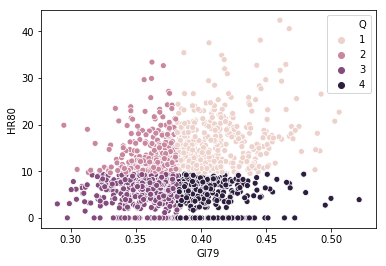

In [81]:
sns.scatterplot('GI79', 'HR80', hue='Q', data=df)

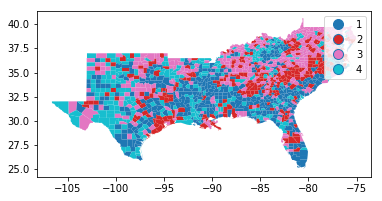

In [72]:
df['Q'] = Q
df.plot('Q', categorical=True, legend=True)

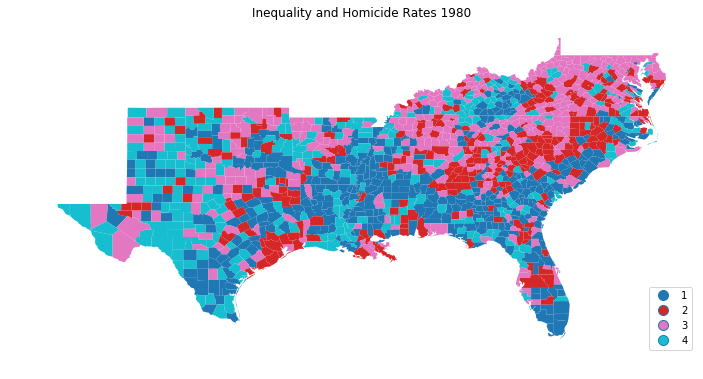

In [73]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='Q',categorical=True, axes=ax, legend=True,
            legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
plt.title('Inequality and Homicide Rates 1980')
plt.show()

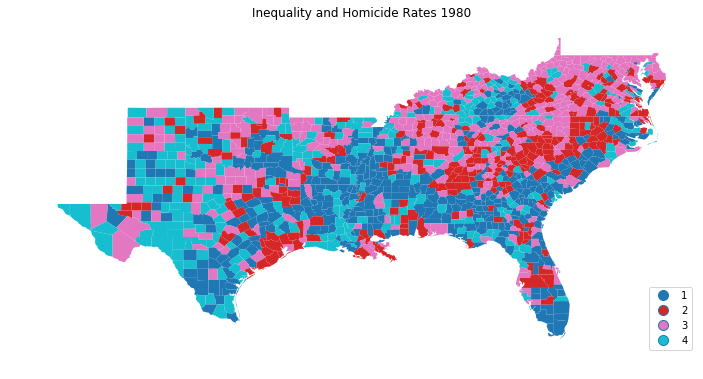

In [74]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='Q',categorical=True, axes=ax, legend=True,
            legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
plt.title('Inequality and Homicide Rates 1980')
plt.show()

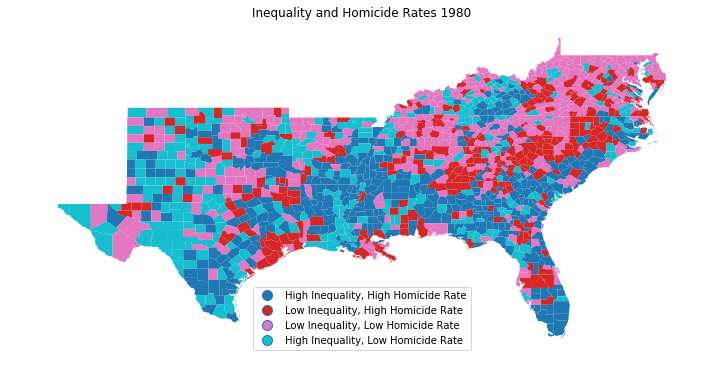

In [75]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = df.plot(column='Q',categorical=True, axes=ax, legend=True,
            legend_kwds={'loc': 'lower center'})
ax.set_axis_off()
leg = ax.get_legend()
leg.get_texts()[0].set_text('High Inequality, High Homicide Rate')
leg.get_texts()[1].set_text('Low Inequality, High Homicide Rate')
leg.get_texts()[2].set_text('Low Inequality, Low Homicide Rate')
leg.get_texts()[3].set_text('High Inequality, Low Homicide Rate')



plt.title('Inequality and Homicide Rates 1980')
plt.show()

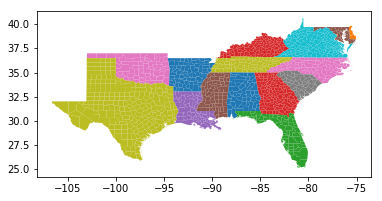

In [42]:
df.plot('STFIPS', categorical=True)

[Four Color Theorem](https://en.wikipedia.org/wiki/Four_color_theorem)